In [1]:
import torch
import numpy as np
import gymnasium as gym

import sys
sys.path.append('../../..')
from tools.trainer import Trainer
from tools.logger import Logger
from environments.hockey_wrapper import HockeyWrapper
from TD3 import TD3Agent
import laserhockey.hockey_env as h_env

In [2]:
env_string = "Hockey"

In [3]:
if env_string == "Hockey":
    env = HockeyWrapper(mode="normal", opponent="mixed", add_opponents=True)
else:
    env = gym.make(env_string)

In [4]:
agent = TD3Agent(env.observation_space, env.action_space)
trainer = Trainer()

In [5]:
# player = h_env.BasicOpponent(weak=False)
player = agent

In [6]:
state = torch.load("checkpoint_hockey.pth")
agent.restore_state(state)
# logger = Logger(30000, 100)
# logger.load("logs/hockey_strong.npy")
# trainer.logger = logger

In [21]:
ep_rewards = trainer.train(env, agent, n_episodes=100000, test_every=100, noise=0.2, player=player, mixed=False)

Step 16101/100000:
                    test reward: 1.56
                    mean reward: -4.79, max reward: 10.00
                    Avg. step count: 168.1, Avg ep duration: 0.057s
                    Avg. critic loss: 0.12, Avg. actor loss: 4.92
                    Avg. train duration: 0.133s
                    winrate: 0.43, drawrate: 0.52, lossrate: 0.05
            
Step 16201/100000:
                    test reward: 1.38
                    mean reward: -2.59, max reward: 9.90
                    Avg. step count: 180.9, Avg ep duration: 0.058s
                    Avg. critic loss: 0.12, Avg. actor loss: 4.90
                    Avg. train duration: 0.128s
                    winrate: 0.40, drawrate: 0.57, lossrate: 0.03
            
Step 16301/100000:
                    test reward: 4.50
                    mean reward: -0.32, max reward: 10.00
                    Avg. step count: 157.7, Avg ep duration: 0.051s
                    Avg. critic loss: 0.11, Avg. actor loss: 4.89


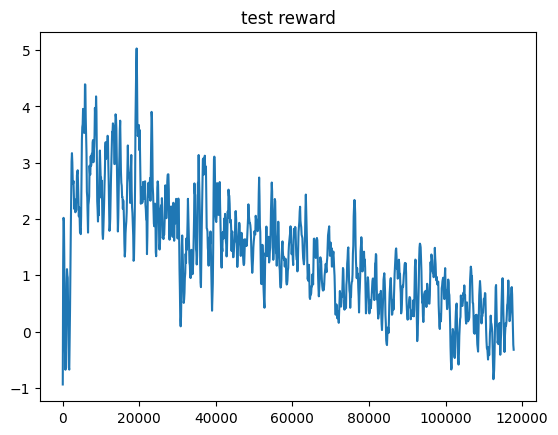

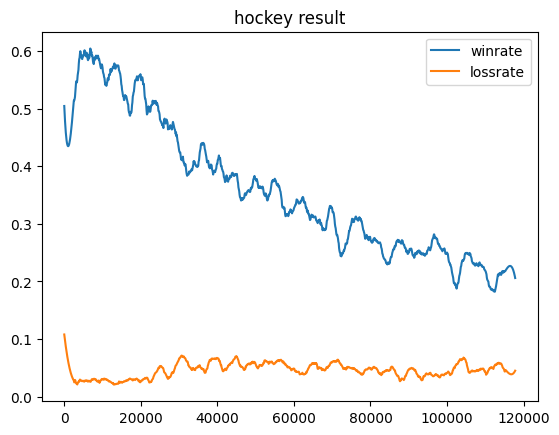

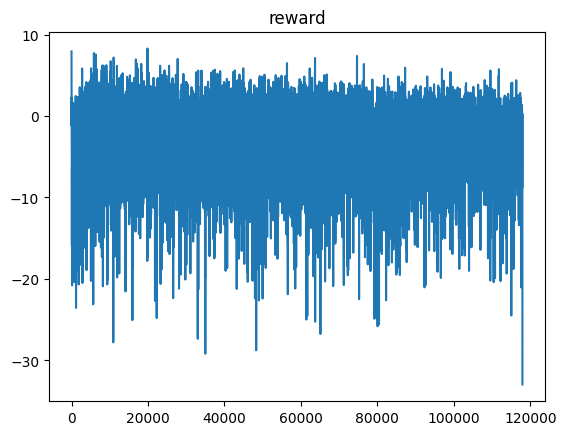

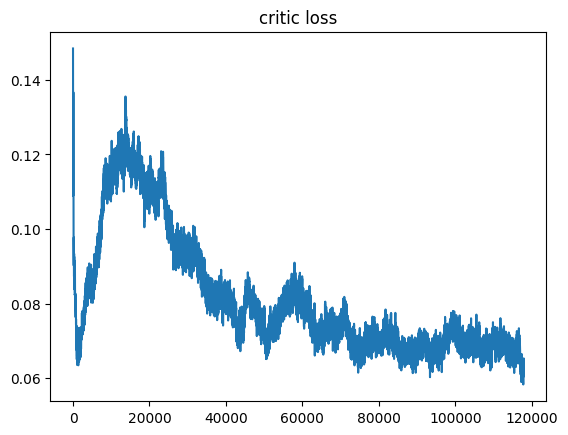

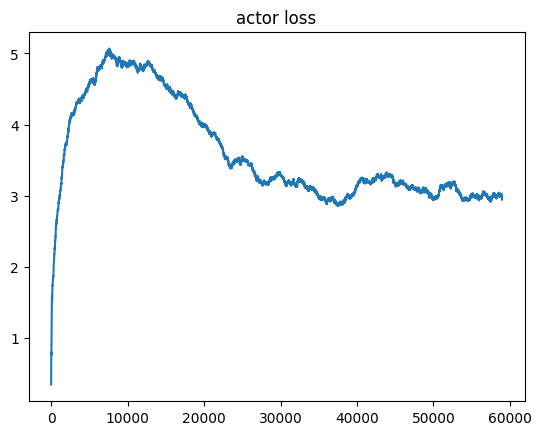

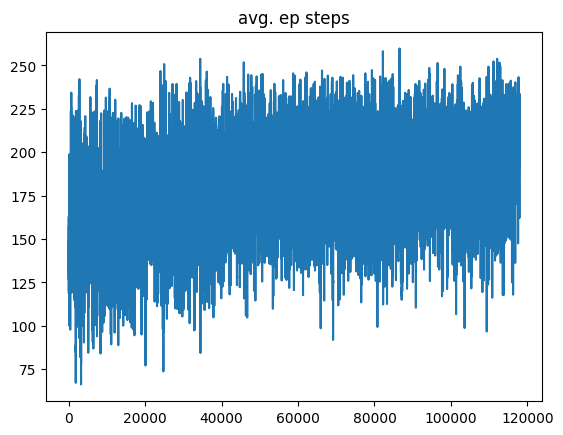

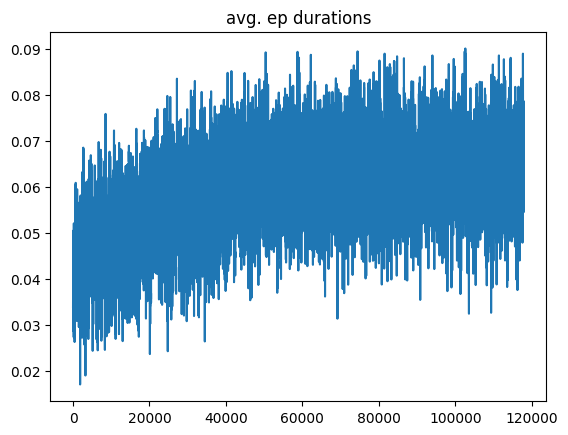

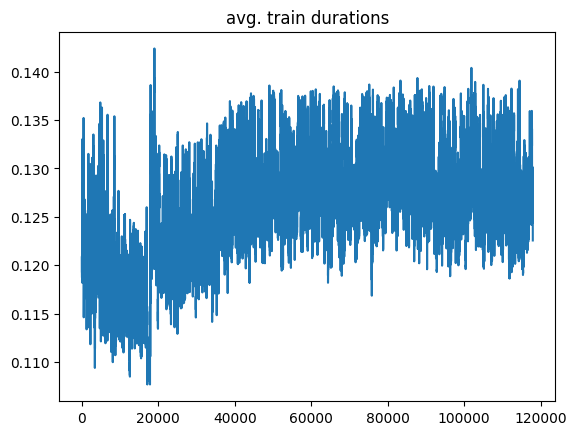

In [22]:
trainer.logger.plot()

In [23]:
def play(env_string, agent, n_episodes=10, noise=0, opponent='strong', render=None):
    if env_string == 'Hockey':
        env = HockeyWrapper(mode='normal', opponent=opponent)
        if render is None:
            render = True
    else:
        env = gym.make(env_string, render_mode='human')
        render = False
    # player = h_env.BasicOpponent(weak=False)
    player = agent
    steps, rewards, observations, actions, results = Trainer.run(env, player, n_episodes=n_episodes, noise=noise, render=render, store_transitions=False, hockey=env_string=='Hockey')
    env.close()
    return steps, rewards, observations, actions, results

In [24]:
env.opponent_list

In [30]:
# test_opp = h_env.BasicOpponent(weak=False)
test_opp = env.opponent_list[3]

In [31]:
steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=10, noise=0, render=True, opponent=test_opp)
print(np.mean(rewards))
print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

0.3509832411723905
0.2 0.8 0.0


In [27]:
steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=1000, noise=0, render=False, opponent=test_opp)
print(np.mean(rewards))
print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

1.0438434234818341
0.408 0.483 0.109


In [32]:
trainer.logger.save("logs/hockey_mixed_mixed_add_long.npy")

In [33]:
torch.save(agent.state(), 'checkpoint_hockey_add_long.pth')

In [ ]:
# agent_state = torch.load('checkpoint_hockey.pth')
# agent.restore_state(agent_state)